<a href="https://colab.research.google.com/github/MN-21/MN-1/blob/main/p03_2_RFE_%26_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Housing Prices Prediction in the Delhi region.

A real estate company  has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimize the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.


1. The company wants to identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

2. The company wants to create a linear model that relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

3. The company wants to know the accuracy of the model, i.e. how well these variables can predict house prices.


In [ ]:
import numpy as np
np.random.seed(21)

**1. Looking at Data it**

In [ ]:
import pandas as pd

df=pd.read_csv('Housing.csv')
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [ ]:
df.shape

(545, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Some feature columns are object, we need to take care of them later.

**2. Data Preparation**

In [ ]:
print('mainroad:',np.unique(df['mainroad']))
print('guestroom:',np.unique(df['guestroom']))
print('basement:',np.unique(df['basement']))
print('hotwaterheating:',np.unique(df['hotwaterheating']))
print('airconditioning:',np.unique(df['airconditioning']))
print('prefarea:',np.unique(df['prefarea']))
print('furnishingstatus:',np.unique(df['furnishingstatus']))

mainroad: ['no' 'yes']
guestroom: ['no' 'yes']
basement: ['no' 'yes']
hotwaterheating: ['no' 'yes']
airconditioning: ['no' 'yes']
prefarea: ['no' 'yes']
furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


We  can see that dataset has many columns with values as 'Yes' or 'No'. we need to convert them.

one option is to use OneHotEncoder from sklearn.preprocessing, but we need to apply train_test_split first. note it doesn't return dataframe.

Better option is to use pd.get_dummies( , drop_first=True).

In [ ]:
Df=pd.get_dummies(df, drop_first=True)
Df.head(2)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0


**Creating a new feature**


In [ ]:
Df['area_per_bedrooms']=Df['area']/Df['bedrooms']
Df['bathrooms_per_bedrooms']=Df['bathrooms']/Df['bedrooms']

Df.head(2)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area_per_bedrooms,bathrooms_per_bedrooms
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0,1855.0,0.5
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0,2240.0,1.0


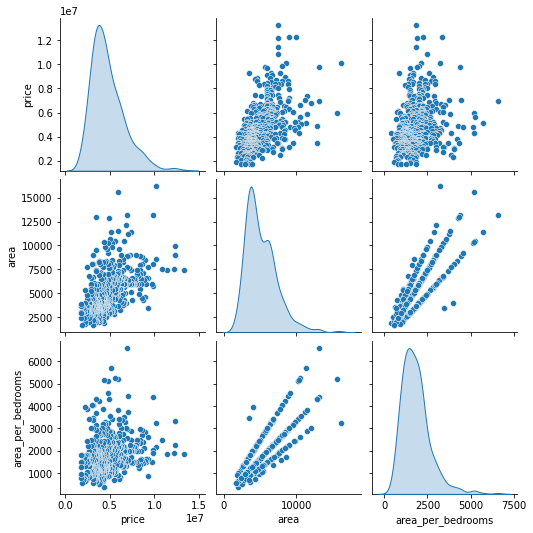

In [ ]:
import seaborn as sns

list=['price','area','area_per_bedrooms']
sns.pairplot(Df[list], kind='scatter',diag_kind='kde')

In [ ]:
Df.corr()['price'].sort_values(ascending=False)

price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                       0.296898
guestroom_yes                      0.255517
area_per_bedrooms                  0.244809
bathrooms_per_bedrooms             0.231732
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64

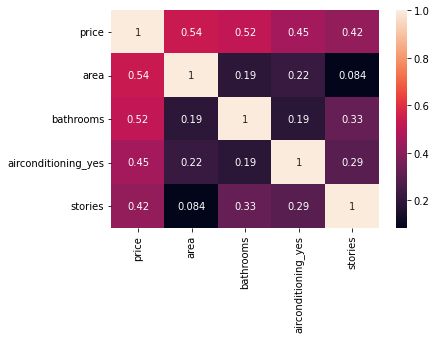

In [ ]:
import seaborn as sns

list=['price','area','bathrooms','airconditioning_yes','stories']
sns.heatmap(Df[list].corr(), annot=True)

In [ ]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    int64  
 1   area                             545 non-null    int64  
 2   bedrooms                         545 non-null    int64  
 3   bathrooms                        545 non-null    int64  
 4   stories                          545 non-null    int64  
 5   parking                          545 non-null    int64  
 6   mainroad_yes                     545 non-null    uint8  
 7   guestroom_yes                    545 non-null    uint8  
 8   basement_yes                     545 non-null    uint8  
 9   hotwaterheating_yes              545 non-null    uint8  
 10  airconditioning_yes              545 non-null    uint8  
 11  prefarea_yes                     545 non-null    uint8  
 12  furnishingstatus_semi-

**3. Splitting data to train & test**

In [ ]:
from sklearn.model_selection import train_test_split

x=Df.drop('price',axis=1)
y=Df['price'].copy()

x_train0, x_test0, y_train, y_test = train_test_split(x,y,test_size=0.25)

area, area_per_bedrooms feature columns have very different scale compare to others. let's do rescaling using StandardScaler or Normalizer or normalize.

In [ ]:
from sklearn.preprocessing  import MinMaxScaler

scaler=MinMaxScaler()

x_train=scaler.fit_transform(x_train0)
x_test=scaler.transform(x_test0)

In [ ]:
x_train=pd.DataFrame(x_train, columns=x_train0.columns)

In [ ]:
x_test=pd.DataFrame(x_test, columns=x_test0.columns)

**4. Model Selection using RFE OR RFECV**

**RFE**

class sklearn.feature_selection.RFE(estimator, *, n_features_to_select=None, step=1, verbose=0, importance_getter='auto')

In [ ]:
x_train.shape

(408, 15)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lin_reg=LinearRegression()
rfe=RFE(lin_reg)

rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

In [ ]:
rfe.n_features_

7

In [ ]:
rfe.support_

array([ True, False,  True,  True,  True, False, False, False, False,
        True,  True, False, False, False,  True])

In [ ]:
rfe.ranking_

array([1, 8, 1, 1, 1, 6, 7, 3, 2, 1, 1, 9, 4, 5, 1])

In [ ]:
pd.DataFrame(rfe.ranking_, index=x.columns)

,0
area,1
bedrooms,8
bathrooms,1
stories,1
parking,1
mainroad_yes,6
guestroom_yes,7
basement_yes,3
hotwaterheating_yes,2
airconditioning_yes,1


In [ ]:
list=['bedrooms','mainroad_yes','guestroom_yes','basement_yes','hotwaterheating_yes',
      'furnishingstatus_semi-furnished','furnishingstatus_unfurnished','area_per_bedrooms']

x_train_rfe=x_train.drop(list,axis=1)

x_test_rfe=x_test.drop(list,axis=1)

sklearn.model_selection.cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=None)

In [ ]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(lin_reg,x_train_rfe,y_train,cv=10,scoring='neg_mean_squared_error')
np.sqrt(-scores).mean().round(1), np.sqrt(-scores).std().round(1)

(1106778.8, 204755.4)

**Hyperparameter Tuning Using Grid SearchCV** 

class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

class sklearn.feature_selection.RFE(estimator, *, n_features_to_select=None, step=1, verbose=0, importance_getter='auto')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lin_reg=LinearRegression()
rfe=RFE(lin_reg)
param_grid=[{'n_features_to_select':range(1,14)}]

grid_search=GridSearchCV(rfe, param_grid, scoring='r2',
                         cv=10,
                         return_train_score=True)

grid_search.fit(x_train_rfe, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': range(1, 14)}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [ ]:
grid_search.best_params_

{'n_features_to_select': 7}

In [ ]:
grid_search.best_estimator_

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=7, step=1, verbose=0)

In [ ]:
cv_res=pd.DataFrame(grid_search.cv_results_)
cv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.019413,0.009954,0.003955,0.004296,1,{'n_features_to_select': 1},0.130767,0.137581,0.38587,0.379779,0.294354,-0.043108,0.32967,0.33499,0.274549,0.24012,0.246457,0.128134,13,0.328905,0.331804,0.307739,0.311856,0.300579,0.32105,0.313845,0.315223,0.320959,0.320031,0.317199,0.008926


In [ ]:
cv_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_features_to_select', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

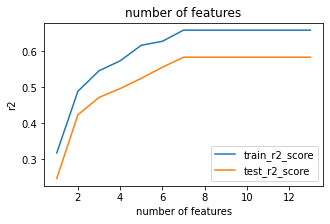

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.plot(cv_res['param_n_features_to_select'],cv_res['mean_train_score'])
plt.plot(cv_res['param_n_features_to_select'],cv_res['mean_test_score'])

plt.xlabel('number of features')
plt.ylabel('r2')

plt.title('number of features')
plt.legend(['train_r2_score','test_r2_score'],loc='lower right')

we see 7 is a good optimal value of number of features and now we can build a final model.

**Making Predictions**


In [ ]:
lin_reg.fit(x_train_rfe,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=lin_reg.predict(x_test_rfe)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)

r2=r2_score(y_test, y_pred)

print('rmse:', rmse.round(1))
print('r2_score:',r2.round(1))

rmse: 1225069.1
r2_score: 0.6


In [ ]:
y_test.shape

(137,)

Text(0.5, 1.0, 'actual and predicted')

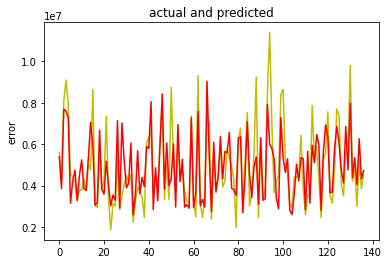

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(y_test)),y_test,color='y')
plt.plot(range(len(y_test)),y_pred,color='r')

plt.ylabel('error')
plt.title('actual and predicted')

Text(0.5, 1.0, 'actual and predicted')

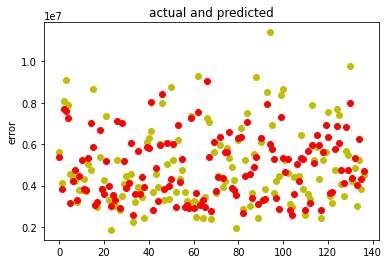

In [ ]:
plt.scatter(range(len(y_test)),y_test,color='y')
plt.scatter(range(len(y_test)),y_pred,color='r')

plt.ylabel('error')
plt.title('actual and predicted')

Text(0.5, 1.0, 'error')

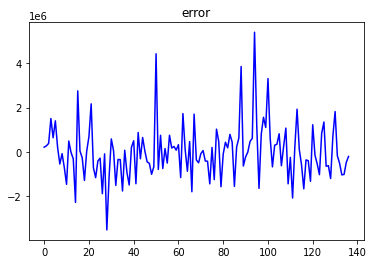

In [ ]:
plt.plot(range(len(y_test)), y_test-y_pred,color='b')
plt.title('error')

**Confidence Interval**

scipy.stats.sem

scipy.stats.sem(a, axis=0, ddof=1, nan_policy='propagate')

Calculate the standard error of the mean of the values in the input array.

In [ ]:
from scipy import stats

confidence=0.95
err=(y_pred-y_test)**2

conf=stats.t.interval(confidence,len(err)-1,
                 loc=err.mean(), scale=stats.sem(err))

np.sqrt(conf).round(1)

array([ 946634.9, 1451024.2])

**RFE plus Polynomial Regression**

polynomial regression of degree n

y=β0+β1x1+β2x12+β3x13...+βnx1n

we want to fit polynomials of various degrees on the housing data and compared their performance on train and test sets. In sklearn, polynomial features can be generated using the PolynomialFeatures class. Also, to perform LinearRegression and PolynomialFeatures in tandem, we will use the module sklearn_pipeline

class sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')

initialise y_train_pred and y_test_pred matrices to store the train and test predictions

each row is a data point, each column a prediction using a polynomial of some degree

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

make_pipeline Construct a Pipeline from the given estimators.

class sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')

In [ ]:
df1 = df.loc[:, ['area', 'price']]
df1.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [ ]:
df1['area'].max(), df1['price'].max()

(16200, 13300000)

In [ ]:
df_train, df_test = train_test_split(df1, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

381
164


In [ ]:
x_train = df_train['area'].values.reshape(-1, 1)
y_train = df_train['price']

x_test = df_test['area'].values.reshape(-1, 1)
y_test = df_test['price']

numpy.zeros(shape, dtype=float)

Return a new array of given shape and type, filled with zeros.

In [ ]:
degrees=[1,2,3]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred= np.zeros((len(x_train), len(degrees)))
y_test_pred= np.zeros((len(x_test), len(degrees)))

for i, degree in enumerate(degrees):
  pipe=make_pipeline(PolynomialFeatures(degree),LinearRegression())
  pipe.fit(x_train, y_train)

  # store the predictions of each degree in the corresponding column
  y_train_pred[:,i]=pipe.predict(x_train)
  y_test_pred[:,i]=pipe.predict(x_test)


visualise train and test predictions
, y axis is on a log scale

In [ ]:
x_train.shape, y_train.shape

((381, 1), (381,))

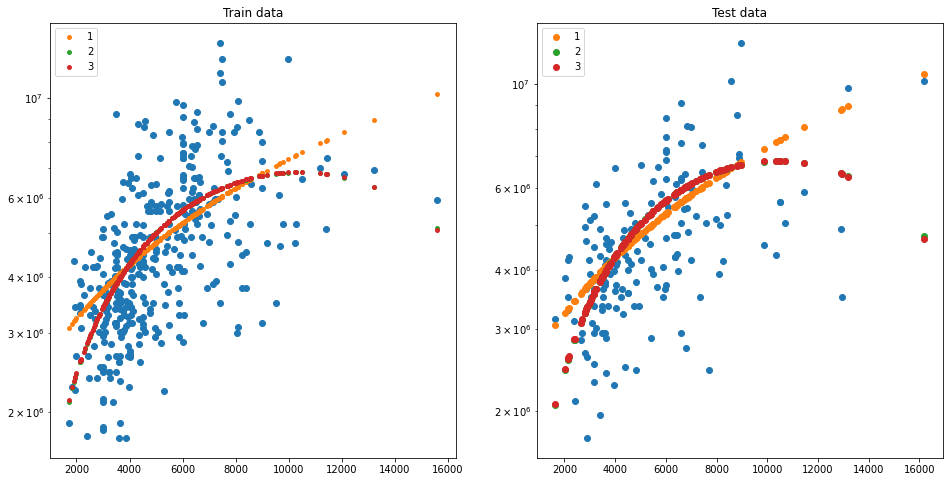

In [ ]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(x_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(x_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    

# test data
plt.subplot(122)
plt.scatter(x_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(x_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [ ]:
from sklearn.metrics import r2_score

compare r2 for train and test sets (for all polynomial fits)

In [ ]:
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.29, test score=0.25
Polynomial degree 2: train score=0.34, test score=0.22
Polynomial degree 3: train score=0.34, test score=0.22
